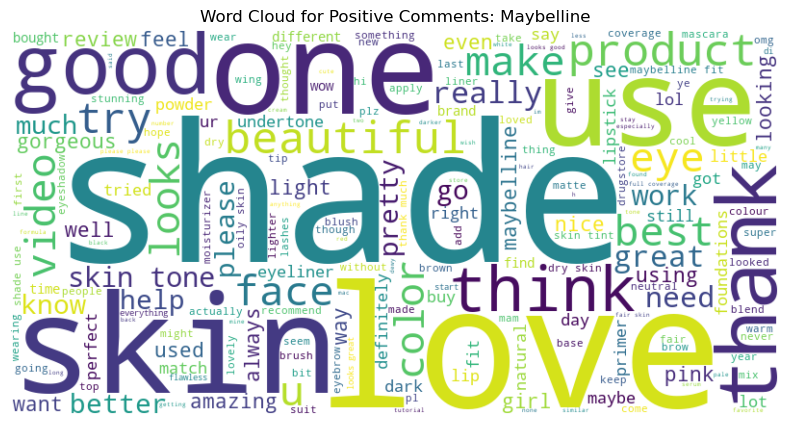

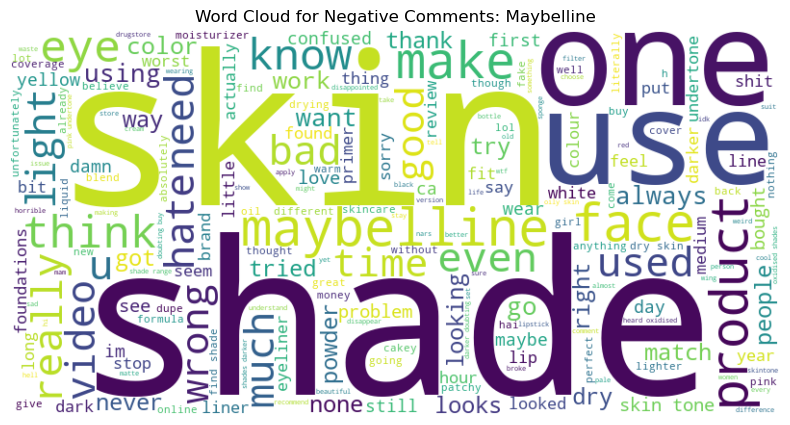

In [58]:
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

with open('submission_with_sentiments_maybelline.json', 'r') as file:
    combined_data = json.load(file)

with open('video_with_sentiments_maybelline.json', 'r') as file:
    video_data = json.load(file)

if isinstance(combined_data, list) and isinstance(video_data, list):
    combined_data.extend(video_data)  
else:
    print("Error: One or both files do not contain list data.")

positive_comments = []
negative_comments = []

for video in combined_data:
    original_comments = video.get('comments', [])
    sentiment_scores = video.get('sentiment_scores', [])

    for original_comment, score in zip(original_comments, sentiment_scores):
        if score > 0.05:  
            positive_comments.append(original_comment)
        elif score < -0.05: 
            negative_comments.append(original_comment)

def preprocess_comments(comments):
    stop_words = set(stopwords.words('english'))
    custom_stopwords = ['tarte', 'makeup', 'foundation', 'concealer', 'look']
    stop_words.update(custom_stopwords)
    processed_comments = []
    
    for comment in comments:
        tokens = word_tokenize(comment.lower()) 
        tokens = [tok for tok in tokens if tok.isalnum() and tok not in stop_words] 
        processed_comments.append(' '.join(tokens))  
    
    return processed_comments

processed_positive_comments = preprocess_comments(positive_comments)
processed_negative_comments = preprocess_comments(negative_comments)

positive_text = ' '.join(processed_positive_comments)
negative_text = ' '.join(processed_negative_comments)

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          max_words=200).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(positive_text, 'Word Cloud for Positive Comments: Maybelline')
generate_wordcloud(negative_text, 'Word Cloud for Negative Comments: Maybelline')
